In [13]:
import konlpy
import pandas as pd

In [14]:
from konlpy.tag import Kkma
from konlpy.tag import Komoran

In [1]:
with open('category2_merge.txt', 'r', encoding='UTF8') as f:
    lines = f.read().splitlines()
lines

['레오 넘이뿌다 행복하게 편히 잘살아라♡',
 'This is really heartwarming 💓',
 '3:34꼬리:살랑살랑',
 '강형욱씨와 아내분 정말 대단하시네요 존경합니다 좋은일 하시는 만큼 두세배 다 되돌아오길 바랍니다🙏',
 '떨어져있던 동안 얼마나 보고싶었을지 형욱님 말 듣기만해도 눈물이 나네요 울지 마 내일 수능이야',
 '왜 눈물이 나지?? 슬픈 영상이아닌데??',
 '아웅 귀여웡ㅎ',
 '8년이나 공무에 종사했으면\xa0 남은생 행복하게 즐겁게만 살았으면좋겠네요그리고 퇴역견들 퇴직금대신 세금으로\xa0 노후보장하고 좋은가족만나서 쉴수있게 해줘요',
 '래오야 인자 어디가디말고 평생 같이살오',
 '레오랑 강형욱님 정말 행복해보여 보는 내내 뭉클하고 행복함을 느겼네요ㅎㅎ',
 '원래 자리로 돌아온것같아 기쁘네요~~^^',
 '너무 보기 좋아요',
 '아이구ㅠㅠㅠㅠ보는 내내 웃음이 끊이질 않네요,,, 레오 넘 귀엽다ㅠㅠㅠㅠ앞으로 편안하게 행복만 하길ㅠㅜ',
 '강형욱님을만나. 앞으로 험한산길이아닌 꽃길만걸을걸 생각하니 너무좋고 기쁩니다..',
 '레오 지금 몆살인지 아시는분 알려주세요 ㅜ',
 '전역한지 몇시간만에..늠름하던 베테랑 경찰견 => 똘아이 애기...',
 '7:59주운아!저 개랑 놀자말자 알았지???로 되어 있어요!!',
 'Great service Leo and you deserve a loving kindness and loving family',
 '이제는 정말 다 놔둬 되겠다 레오',
 '저게 어딜봐서 군견이여ㅠㅜㅠㅜ완전 아기똥강아지구먼ㅜㅠㅜㅜ ',
 'ㅇ욜루라리기여워ㅠㅜㅠㅜ아진자 많이늙었는대 힘펄펄한것보소 우리 푸들이는 8살밖에 안된ㄴ놈들이 늙었어ㅠㅜㅜㅜ아진자 넘  살앙스럽다',
 '강아지는 왜 남의 강아지 거기..냄새를 맡아요?',
 'Thank you for your service Leo!!',
 '최근 레오보다가 옛날 영상보니까 확실히 차이가 있어요!! 옛날보다 꼬리도 더 풍성해졌고 털도 윤기가 나네요 ㅎㅎ',


In [2]:
sentences = [line for line in lines if (line != '' and line != ' ')]
print(len(sentences))
sentences

65129


['레오 넘이뿌다 행복하게 편히 잘살아라♡',
 'This is really heartwarming 💓',
 '3:34꼬리:살랑살랑',
 '강형욱씨와 아내분 정말 대단하시네요 존경합니다 좋은일 하시는 만큼 두세배 다 되돌아오길 바랍니다🙏',
 '떨어져있던 동안 얼마나 보고싶었을지 형욱님 말 듣기만해도 눈물이 나네요 울지 마 내일 수능이야',
 '왜 눈물이 나지?? 슬픈 영상이아닌데??',
 '아웅 귀여웡ㅎ',
 '8년이나 공무에 종사했으면\xa0 남은생 행복하게 즐겁게만 살았으면좋겠네요그리고 퇴역견들 퇴직금대신 세금으로\xa0 노후보장하고 좋은가족만나서 쉴수있게 해줘요',
 '래오야 인자 어디가디말고 평생 같이살오',
 '레오랑 강형욱님 정말 행복해보여 보는 내내 뭉클하고 행복함을 느겼네요ㅎㅎ',
 '원래 자리로 돌아온것같아 기쁘네요~~^^',
 '너무 보기 좋아요',
 '아이구ㅠㅠㅠㅠ보는 내내 웃음이 끊이질 않네요,,, 레오 넘 귀엽다ㅠㅠㅠㅠ앞으로 편안하게 행복만 하길ㅠㅜ',
 '강형욱님을만나. 앞으로 험한산길이아닌 꽃길만걸을걸 생각하니 너무좋고 기쁩니다..',
 '레오 지금 몆살인지 아시는분 알려주세요 ㅜ',
 '전역한지 몇시간만에..늠름하던 베테랑 경찰견 => 똘아이 애기...',
 '7:59주운아!저 개랑 놀자말자 알았지???로 되어 있어요!!',
 'Great service Leo and you deserve a loving kindness and loving family',
 '이제는 정말 다 놔둬 되겠다 레오',
 '저게 어딜봐서 군견이여ㅠㅜㅠㅜ완전 아기똥강아지구먼ㅜㅠㅜㅜ ',
 'ㅇ욜루라리기여워ㅠㅜㅠㅜ아진자 많이늙었는대 힘펄펄한것보소 우리 푸들이는 8살밖에 안된ㄴ놈들이 늙었어ㅠㅜㅜㅜ아진자 넘  살앙스럽다',
 '강아지는 왜 남의 강아지 거기..냄새를 맡아요?',
 'Thank you for your service Leo!!',
 '최근 레오보다가 옛날 영상보니까 확실히 차이가 있어요!! 옛날보다 꼬리도 더 풍성해졌고 털도 윤기가 나네요 ㅎㅎ',


In [3]:
import re
import sys

def refine(TEXT):
    EMOJI = re.compile('['
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                        u"\U0001F680-\U0001F6FF"  # transport & map symbols
                        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                        u"\U00010000-\U0010ffff"
                        ']+', flags=re.UNICODE)
    return EMOJI.sub(r'', TEXT)

In [5]:
import random
random = random.sample(sentences, 2000)

In [6]:
with open('random2000_2.txt', 'w', encoding = 'utf-8') as f:
    for item in random:
        f.write("%s\n" % item)

In [7]:
with open('random2000_2.txt', 'r', encoding='UTF8') as f:
    lines2 = f.read().splitlines()
lines2

['귀여워라',
 'WHO IS THIS GOOD BOY',
 'Wao!  I  really love this cute puppy with teady bear style ohh',
 "- I'm your father ",
 '나 원래 개 안 좋아하는데 좀 존귀탱이네',
 'Ассалаумағаликум қазақ бауырлар',
 'Next: the cats appear on Judge Judy to get this custody business straightened out.',
 'Cool cat',
 'ooooo my god wowwwwww wht a lovey dog',
 'so cute💞',
 '견종이 궁금해서 그런데 뭔가요?',
 'I m so kild',
 'By the way so cute 🐾',
 'I want a pet in my home but my mum she’s refused💔💔💔💔.. tell me a way to get her permission 😭',
 '아이패드는 어떻게 됬어요?',
 '..................',
 'Dadio:  Say whut?',
 '영상이 좀 길었으면 좋겠네요‥‥',
 'น้อนนนนนน',
 'The dad needs someone to explain birds and bees to him...definitely didn’t expect any of this',
 '심장테러란 게 바로 이거구나-',
 'Кот в конце вообще как чмо))',
 'Aww so cute',
 '日本人いて欲しい',
 '루루!!ㄴㅋ',
 "*He don't want his daddy Bacc*",
 '첼시랑  사이안조을거같다는말  웃겨요 ㅋㅋ',
 'Owner use Confusion',
 'I wish my dog was as chill as this',
 '3:25 he smiled and won our heart',
 'the goodiest boy of dem all',
 '놀무룩...ㅋㅋㅋ

In [8]:
sentences2 = [line for line in lines2 if (line != '' and line != ' ')]
print(len(sentences2))
sentences2

2000


['귀여워라',
 'WHO IS THIS GOOD BOY',
 'Wao!  I  really love this cute puppy with teady bear style ohh',
 "- I'm your father ",
 '나 원래 개 안 좋아하는데 좀 존귀탱이네',
 'Ассалаумағаликум қазақ бауырлар',
 'Next: the cats appear on Judge Judy to get this custody business straightened out.',
 'Cool cat',
 'ooooo my god wowwwwww wht a lovey dog',
 'so cute💞',
 '견종이 궁금해서 그런데 뭔가요?',
 'I m so kild',
 'By the way so cute 🐾',
 'I want a pet in my home but my mum she’s refused💔💔💔💔.. tell me a way to get her permission 😭',
 '아이패드는 어떻게 됬어요?',
 '..................',
 'Dadio:  Say whut?',
 '영상이 좀 길었으면 좋겠네요‥‥',
 'น้อนนนนนน',
 'The dad needs someone to explain birds and bees to him...definitely didn’t expect any of this',
 '심장테러란 게 바로 이거구나-',
 'Кот в конце вообще как чмо))',
 'Aww so cute',
 '日本人いて欲しい',
 '루루!!ㄴㅋ',
 "*He don't want his daddy Bacc*",
 '첼시랑  사이안조을거같다는말  웃겨요 ㅋㅋ',
 'Owner use Confusion',
 'I wish my dog was as chill as this',
 '3:25 he smiled and won our heart',
 'the goodiest boy of dem all',
 '놀무룩...ㅋㅋㅋ

In [9]:
sentences3 = [refine(s) for s in sentences]
print(len(sentences3))
sentences3

65129


['레오 넘이뿌다 행복하게 편히 잘살아라♡',
 'This is really heartwarming ',
 '3:34꼬리:살랑살랑',
 '강형욱씨와 아내분 정말 대단하시네요 존경합니다 좋은일 하시는 만큼 두세배 다 되돌아오길 바랍니다',
 '떨어져있던 동안 얼마나 보고싶었을지 형욱님 말 듣기만해도 눈물이 나네요 울지 마 내일 수능이야',
 '왜 눈물이 나지?? 슬픈 영상이아닌데??',
 '아웅 귀여웡ㅎ',
 '8년이나 공무에 종사했으면\xa0 남은생 행복하게 즐겁게만 살았으면좋겠네요그리고 퇴역견들 퇴직금대신 세금으로\xa0 노후보장하고 좋은가족만나서 쉴수있게 해줘요',
 '래오야 인자 어디가디말고 평생 같이살오',
 '레오랑 강형욱님 정말 행복해보여 보는 내내 뭉클하고 행복함을 느겼네요ㅎㅎ',
 '원래 자리로 돌아온것같아 기쁘네요~~^^',
 '너무 보기 좋아요',
 '아이구ㅠㅠㅠㅠ보는 내내 웃음이 끊이질 않네요,,, 레오 넘 귀엽다ㅠㅠㅠㅠ앞으로 편안하게 행복만 하길ㅠㅜ',
 '강형욱님을만나. 앞으로 험한산길이아닌 꽃길만걸을걸 생각하니 너무좋고 기쁩니다..',
 '레오 지금 몆살인지 아시는분 알려주세요 ㅜ',
 '전역한지 몇시간만에..늠름하던 베테랑 경찰견 => 똘아이 애기...',
 '7:59주운아!저 개랑 놀자말자 알았지???로 되어 있어요!!',
 'Great service Leo and you deserve a loving kindness and loving family',
 '이제는 정말 다 놔둬 되겠다 레오',
 '저게 어딜봐서 군견이여ㅠㅜㅠㅜ완전 아기똥강아지구먼ㅜㅠㅜㅜ ',
 'ㅇ욜루라리기여워ㅠㅜㅠㅜ아진자 많이늙었는대 힘펄펄한것보소 우리 푸들이는 8살밖에 안된ㄴ놈들이 늙었어ㅠㅜㅜㅜ아진자 넘  살앙스럽다',
 '강아지는 왜 남의 강아지 거기..냄새를 맡아요?',
 'Thank you for your service Leo!!',
 '최근 레오보다가 옛날 영상보니까 확실히 차이가 있어요!! 옛날보다 꼬리도 더 풍성해졌고 털도 윤기가 나네요 ㅎㅎ',
 '

In [10]:
sentences4 = [line for line in sentences3 if (line != '' and line != ' ' and line)]
print(len(sentences4))
sentences4

63923


['레오 넘이뿌다 행복하게 편히 잘살아라♡',
 'This is really heartwarming ',
 '3:34꼬리:살랑살랑',
 '강형욱씨와 아내분 정말 대단하시네요 존경합니다 좋은일 하시는 만큼 두세배 다 되돌아오길 바랍니다',
 '떨어져있던 동안 얼마나 보고싶었을지 형욱님 말 듣기만해도 눈물이 나네요 울지 마 내일 수능이야',
 '왜 눈물이 나지?? 슬픈 영상이아닌데??',
 '아웅 귀여웡ㅎ',
 '8년이나 공무에 종사했으면\xa0 남은생 행복하게 즐겁게만 살았으면좋겠네요그리고 퇴역견들 퇴직금대신 세금으로\xa0 노후보장하고 좋은가족만나서 쉴수있게 해줘요',
 '래오야 인자 어디가디말고 평생 같이살오',
 '레오랑 강형욱님 정말 행복해보여 보는 내내 뭉클하고 행복함을 느겼네요ㅎㅎ',
 '원래 자리로 돌아온것같아 기쁘네요~~^^',
 '너무 보기 좋아요',
 '아이구ㅠㅠㅠㅠ보는 내내 웃음이 끊이질 않네요,,, 레오 넘 귀엽다ㅠㅠㅠㅠ앞으로 편안하게 행복만 하길ㅠㅜ',
 '강형욱님을만나. 앞으로 험한산길이아닌 꽃길만걸을걸 생각하니 너무좋고 기쁩니다..',
 '레오 지금 몆살인지 아시는분 알려주세요 ㅜ',
 '전역한지 몇시간만에..늠름하던 베테랑 경찰견 => 똘아이 애기...',
 '7:59주운아!저 개랑 놀자말자 알았지???로 되어 있어요!!',
 'Great service Leo and you deserve a loving kindness and loving family',
 '이제는 정말 다 놔둬 되겠다 레오',
 '저게 어딜봐서 군견이여ㅠㅜㅠㅜ완전 아기똥강아지구먼ㅜㅠㅜㅜ ',
 'ㅇ욜루라리기여워ㅠㅜㅠㅜ아진자 많이늙었는대 힘펄펄한것보소 우리 푸들이는 8살밖에 안된ㄴ놈들이 늙었어ㅠㅜㅜㅜ아진자 넘  살앙스럽다',
 '강아지는 왜 남의 강아지 거기..냄새를 맡아요?',
 'Thank you for your service Leo!!',
 '최근 레오보다가 옛날 영상보니까 확실히 차이가 있어요!! 옛날보다 꼬리도 더 풍성해졌고 털도 윤기가 나네요 ㅎㅎ',
 '

In [15]:
tagged_sentences2 = []
tagger = Komoran()

for sent in sentences4:
    try:
        tagged_sentences2.append(tagger.pos(sent)) 
    except:
        True 
print(len(tagged_sentences2))
tagged_sentences2[0]

63897


[('레오', 'NNP'),
 ('넘이뿌다', 'NA'),
 ('행복', 'NNG'),
 ('하', 'XSV'),
 ('게', 'EC'),
 ('편히', 'MAG'),
 ('잘살', 'VV'),
 ('ㄹ', 'ETM'),
 ('아라', 'NNP'),
 ('♡', 'SW')]

In [9]:
adj_list = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag == 'VA':
            adj_list.append(word)
print(len(adj_list))
adj_list[:10]

6521


['좋', '슬프', '즐겁', '좋', '좋', '같', '기쁘', '좋', '험하', '좋']

In [10]:
from collections import Counter
adj_counts = Counter(adj_list)
adj_counts.most_common()

[('귀엽', 1445),
 ('좋', 806),
 ('같', 665),
 ('없', 273),
 ('이렇', 227),
 ('맛있', 216),
 ('많', 197),
 ('크', 173),
 ('이쁘', 169),
 ('저렇', 157),
 ('그렇', 154),
 ('어떻', 134),
 ('예쁘', 121),
 ('순하', 96),
 ('괜찮', 91),
 ('아프', 80),
 ('착하', 73),
 ('날카롭', 71),
 ('재밌', 63),
 ('작', 51),
 ('힘들', 49),
 ('무섭', 49),
 ('싫', 47),
 ('시', 43),
 ('어리', 41),
 ('편하', 40),
 ('멋지', 36),
 ('즐겁', 35),
 ('슬프', 33),
 ('고맙', 33),
 ('똑같', 29),
 ('부럽', 27),
 ('부드럽', 27),
 ('멀', 24),
 ('다르', 23),
 ('쉽', 22),
 ('길', 22),
 ('기쁘', 20),
 ('하얗', 20),
 ('짧', 18),
 ('새롭', 18),
 ('재미있', 18),
 ('안되', 18),
 ('배고프', 17),
 ('잘', 16),
 ('나쁘', 15),
 ('약하', 15),
 ('맛나', 14),
 ('쎄', 13),
 ('높', 12),
 ('엄청나', 12),
 ('잘생기', 12),
 ('강하', 12),
 ('아름답', 11),
 ('멋있', 11),
 ('심하', 11),
 ('늦', 11),
 ('상관없', 10),
 ('어렵', 9),
 ('징그럽', 9),
 ('급하', 9),
 ('맛없', 9),
 ('반갑', 8),
 ('낫', 8),
 ('야무지', 8),
 ('아깝', 8),
 ('빨갛', 8),
 ('바르', 7),
 ('찡하', 7),
 ('적', 7),
 ('아쉽', 7),
 ('낯설', 7),
 ('까맣', 7),
 ('희', 6),
 ('친하', 6),
 ('귀찮', 6),
 ('사납', 6),
 ('동그랗', 6),


In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [12]:
cloud = WordCloud(width=900, height=600, 
                  font_path='08서울남산체 B.ttf',
                  background_color='white')

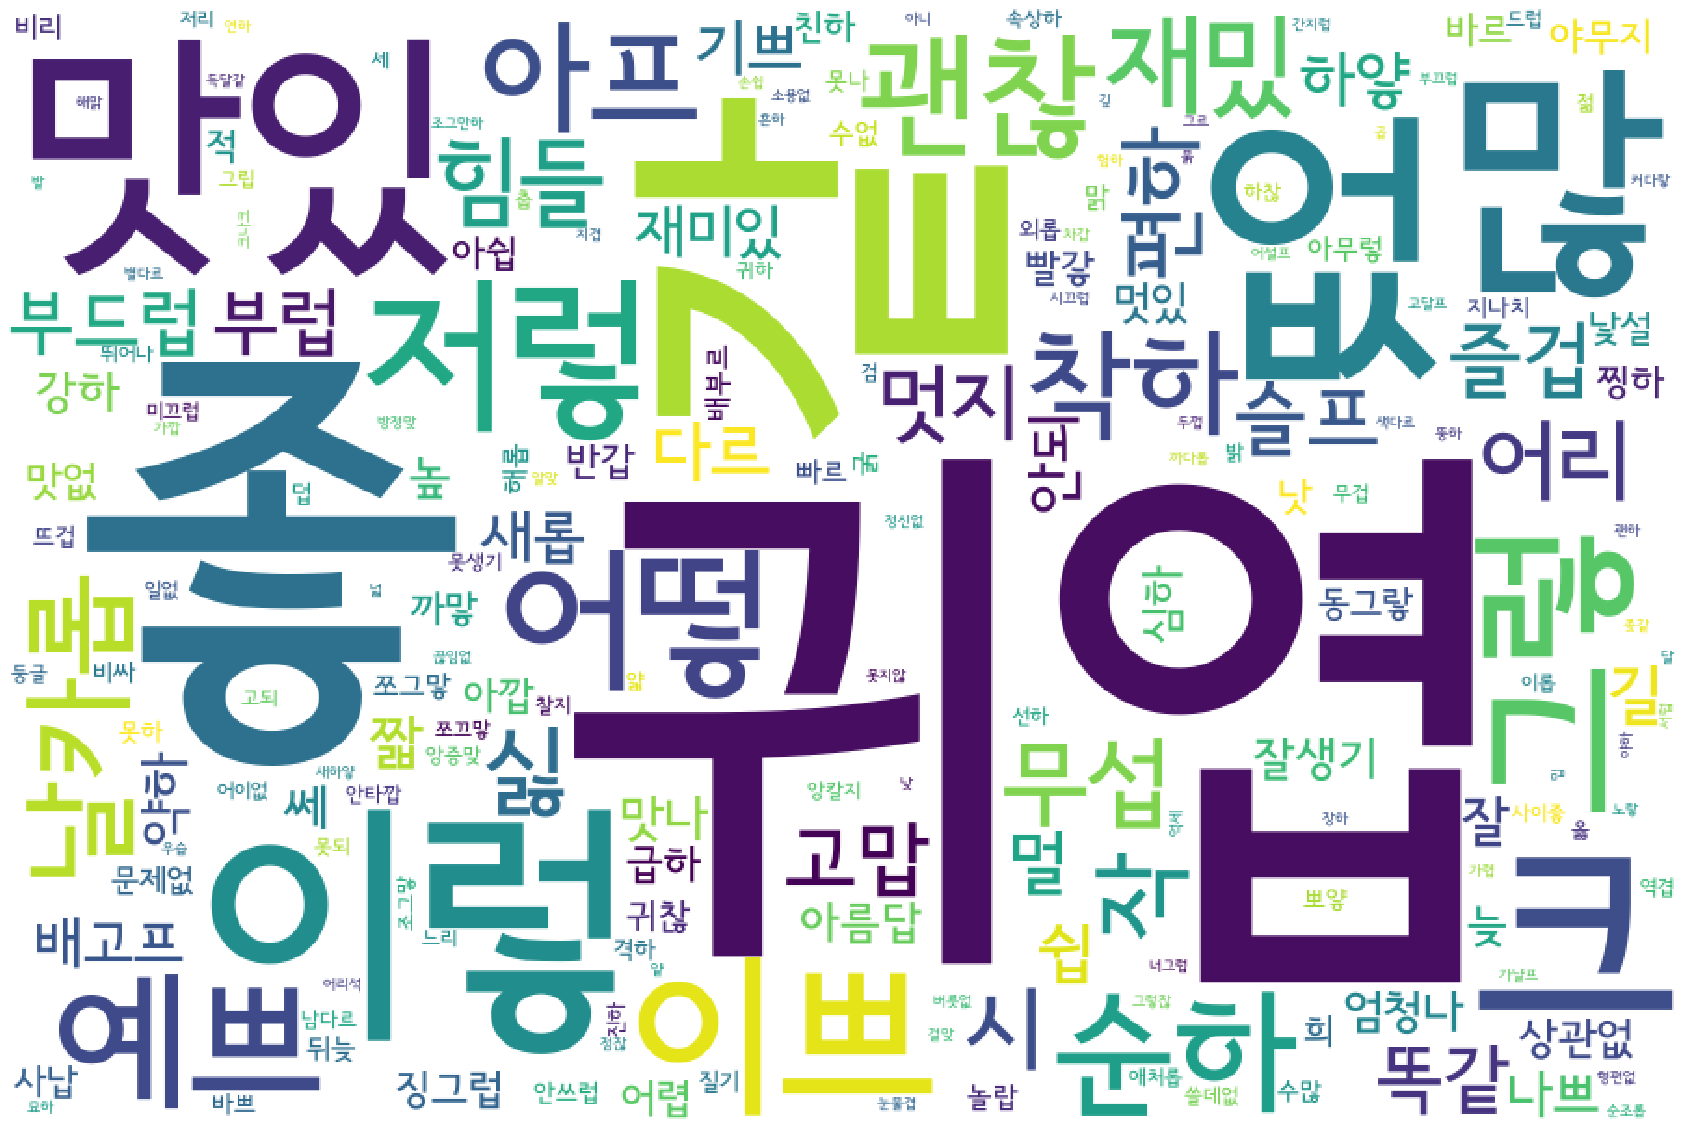

In [13]:
cloud = cloud.fit_words(adj_counts)
fig = plt.figure(figsize=(30, 40))
plt.imshow(cloud)
plt.axis('off')
plt.savefig('category2_adj.jpg')
plt.show()

In [14]:
noun_list = []
for sent in tagged_sentences2:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
noun_list2 = [n for n in noun_list if n not in ('!!', '!!!', '루', '닭', '레오')]
print(len(noun_list2))
noun_list2[:10]

44049


['행복', '아라', '꼬리', '강', '형', '아내', '존경', '일', '세배', '동안']

In [15]:
noun_counts = Counter(noun_list2)
noun_counts.most_common()

[('강아지', 1065),
 ('뼈', 888),
 ('소녀', 839),
 ('귀', 640),
 ('귀여워', 630),
 ('영상', 571),
 ('때', 501),
 ('넘', 477),
 ('고양이', 453),
 ('집사', 443),
 ('행복', 438),
 ('ال', 428),
 ('소리', 423),
 ('이', 420),
 ('아빠', 395),
 ('사람', 335),
 ('안', 326),
 ('견', 306),
 ('애기', 268),
 ('얌전', 242),
 ('노을', 234),
 ('사랑', 232),
 ('장난감', 231),
 ('집', 229),
 ('오늘', 226),
 ('애', 212),
 ('엽', 211),
 ('생식', 204),
 ('심장', 200),
 ('형', 199),
 ('아', 198),
 ('댓글', 190),
 ('말', 184),
 ('강', 179),
 ('하', 179),
 ('처음', 178),
 ('털', 177),
 ('심', 175),
 ('미용', 174),
 ('요', 173),
 ('어', 167),
 ('건강', 157),
 ('행성', 157),
 ('오', 153),
 ('표정', 152),
 ('엄마', 151),
 ('졸', 151),
 ('모습', 150),
 ('생각', 149),
 ("I've", 148),
 ('위험', 140),
 ('눈', 134),
 ('아기', 121),
 ('감사', 112),
 ('눈물', 110),
 ('포', 107),
 ('동물', 106),
 ('북극곰', 106),
 ('이제', 104),
 ('전', 104),
 ('완전', 103),
 ('곰', 101),
 ('치킨', 100),
 ('진짜', 97),
 ('눈치', 96),
 ('다', 95),
 ('주인', 95),
 ('사', 94),
 ('제가', 94),
 ('느', 90),
 ('가족', 89),
 ('세상', 88),
 ('먹방', 88),
 ('아가', 

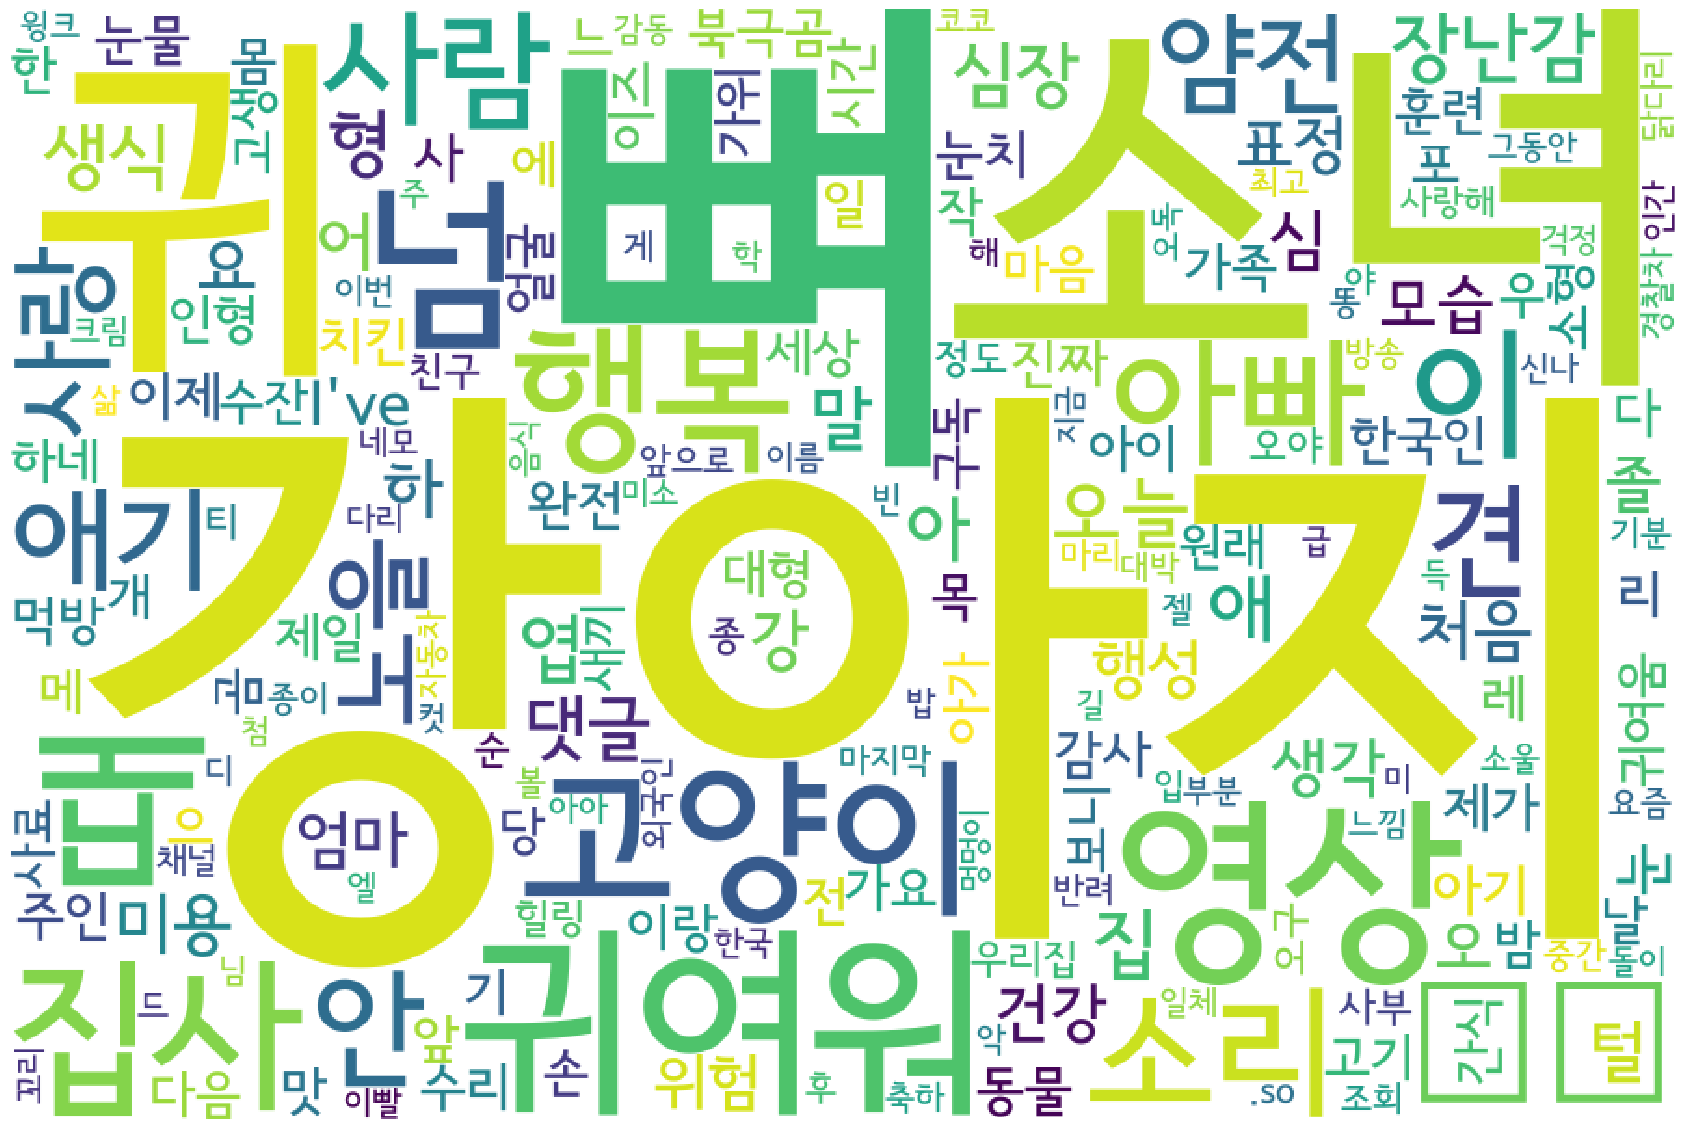

In [18]:
cloud = cloud.fit_words(noun_counts)
fig = plt.figure(figsize=(30, 40))
plt.imshow(cloud)
plt.axis('off')
plt.savefig("category3_noun.jpg")
plt.show()